In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trainmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\train.csv")


In [53]:
testmain=pd.read_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\test.csv")

In [5]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
def uniquevalues(df):
    for col in df.columns:
        if df[col].dtype=='O':
            print("The unique values of {0} is {1}".format(col,df[col].nunique()))
            
# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category,drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns    

def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            # Print new column type
            print("dtype after: ",props[col].dtype)
            print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [6]:
# Missing values statistics
df=trainmain
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 29 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [7]:
# Missing values statistics
df_test=testmain
missing_values = missing_values_table(df_test)
missing_values.head(20)

Your selected dataframe has 28 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

In [8]:
uniquevalues(df)

The unique values of source is 3
The unique values of financial_institution is 19
The unique values of origination_date is 3
The unique values of first_payment_date is 4
The unique values of loan_purpose is 3


In [9]:
uniquevalues(df_test)

The unique values of source is 3
The unique values of financial_institution is 19
The unique values of origination_date is 3
The unique values of first_payment_date is 4
The unique values of loan_purpose is 3


In [10]:
df.drop('loan_id',axis=1,inplace=True)
df_test.drop('loan_id',axis=1,inplace=True)

In [11]:
df_test['origination_date'] =pd.to_datetime(df_test['origination_date']).dt.strftime('%Y-%d-%m')
d = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12 }

In [12]:
def dateformatchange(date):
    Month=date.split('-')[0]
    Year="20"+ date.split('-')[1]
    monthnum=d.get(Month)
    print(Month)
    print(monthnum)
    print(Year)
    newdate= "0" + str(monthnum) + "/" + Year
    print(newdate)
    return newdate
    

In [13]:
df_test['first_payment_date']=df_test['first_payment_date'].apply(dateformatchange)


Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
0

3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/20

Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
0

Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
0

04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr


4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Feb
2
2012
02/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/20

Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
0

2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012

2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012

3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/20

May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
0

Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
0

2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012

03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr


2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012

2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012

4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Feb
2
2012
02/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/20

3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/20

Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
0

Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
0

04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May


03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Feb
2
2012
02/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr


2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012

2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012

3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/20

4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/20

May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
0

Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
0

04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar


04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr


2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012

2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012

3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/20

3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/20

May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Feb
2
2012
02/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
0

Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
0

04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar


04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May


2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012

2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012

4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/20

5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/20

Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
0

May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
0

03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr


04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar


2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Feb
2
2012
02/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Feb
2
2012
02/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012

2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012

4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/20

4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/20

Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Feb
2
2012
02/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
0

Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
0

04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr


03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar


2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012

2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012

3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/20

3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/20

Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
0

Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Apr
4
2012
04/2012
May
5
2012
05/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
Mar
3
2012
03/2012
Apr
4
2012
04/2012
May
5
2012
0

In [14]:

#df_test.first_payment_date=df_test.first_payment_date.apply(lambda x: pd.to_datetime(x).strftime('%m/%Y'))
#df_test.first_payment_date

C:\Users\kaushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


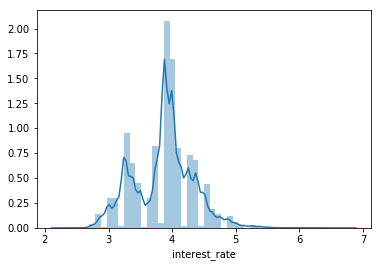

In [15]:
sns.distplot(df['interest_rate'])

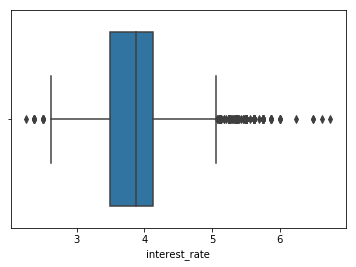

In [16]:
df['interest_rate'].describe()
sns.boxplot(df['interest_rate'])

In [17]:
df=df[df['interest_rate']<6]

C:\Users\kaushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


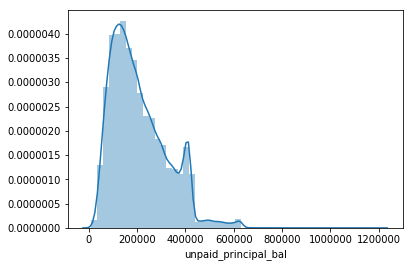

In [18]:
sns.distplot(df['unpaid_principal_bal'])

In [19]:
df[df['unpaid_principal_bal']>700000].count()

source                      21
financial_institution       21
interest_rate               21
unpaid_principal_bal        21
loan_term                   21
origination_date            21
first_payment_date          21
loan_to_value               21
number_of_borrowers         21
debt_to_income_ratio        21
borrower_credit_score       21
loan_purpose                21
insurance_percent           21
co-borrower_credit_score    21
insurance_type              21
m1                          21
m2                          21
m3                          21
m4                          21
m5                          21
m6                          21
m7                          21
m8                          21
m9                          21
m10                         21
m11                         21
m12                         21
m13                         21
dtype: int64

In [20]:
df=df[df['unpaid_principal_bal']<700000]

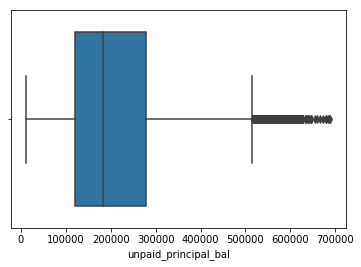

In [21]:
sns.boxplot(df['unpaid_principal_bal'])

In [22]:
df['unpaid_principal_bal'].describe()

count    116028.000000
mean     208131.089047
std      114425.447201
min       11000.000000
25%      120000.000000
50%      182000.000000
75%      278000.000000
max      689000.000000
Name: unpaid_principal_bal, dtype: float64

C:\Users\kaushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


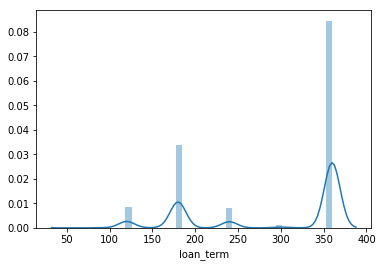

In [23]:
sns.distplot(df['loan_term'])

C:\Users\kaushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


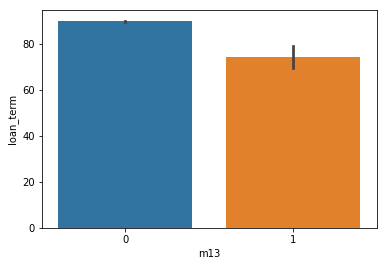

In [24]:
sns.barplot(x='m13',y='loan_term',data=trainmain,estimator=np.std)

C:\Users\kaushik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kaushik\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


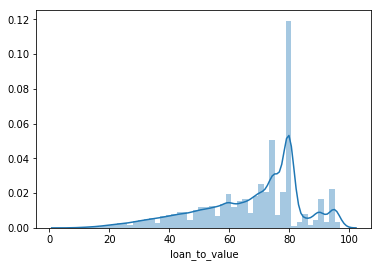

In [25]:
sns.distplot(df['loan_to_value'])

In [26]:
df['loan_to_value'].describe()

count    116028.000000
mean         67.431103
std          17.292639
min           6.000000
25%          57.000000
50%          72.000000
75%          80.000000
max          97.000000
Name: loan_to_value, dtype: float64

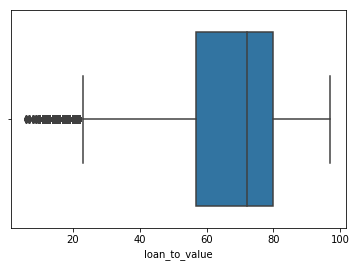

In [27]:
sns.boxplot(df['loan_to_value'])

In [28]:
df=df[df['loan_to_value']>10]

In [29]:
X=df.loc[:, df.columns != 'm13']
y=df['m13']

In [30]:
 X, cat_cols = one_hot_encoder(X, False)

In [35]:
 df, cat_cols = one_hot_encoder(df, False)

In [31]:
 df_test, cat_cols = one_hot_encoder(df_test, False)

In [32]:
df_test.head()

interest_rate  unpaid_principal_bal  loan_term  loan_to_value  \
0          3.875                417000        360             75   
1          4.500                113000        360             80   
2          4.500                 72000        360             75   
3          4.125                123000        180             41   
4          3.250                166000        180             53   

   number_of_borrowers  debt_to_income_ratio  borrower_credit_score  \
0                    1                    20                    790   
1                    2                    33                    793   
2                    1                    34                    710   
3                    2                    24                    798   
4                    2                    12                    767   

   insurance_percent  co-borrower_credit_score  insurance_type  \
0                  0                         0               0   
1                  0                       784               0   
2                  0                         0               0   
3                  0                       813               0   
4                  0                       768               0   

         ...         financial_institution_Taylor, Hunt and Rodriguez  \
0        ...                                                        0   
1        ...                                                        0   
2        ...                                                        0   
3        ...                                                        0   
4        ...                                                        0   

   financial_institution_Thornton-Davis  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   financial_institution_Turner, Baldwin and Rhodes  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   origination_date_2012-02-01  origination_date_2012-03-01  \
0                            1                            0   
1                            1                            0   
2                            0                            0   
3                            1                            0   
4                            1                            0   

   first_payment_date_03/2012  first_payment_date_04/2012  \
0                           0                           1   
1                           0                           1   
2                           1                           0   
3                           0                           1   
4                           0                           1   

   first_payment_date_05/2012  loan_purpose_B12  loan_purpose_C86  
0                           0                 0                 0  
1                           0                 0                 1  
2                           0                 0                 1  
3                           0                 0                 0  
4                           0                 0                 0  

[5 rows x 49 columns]

In [33]:
X, NAlist = reduce_mem_usage(X)

Memory usage of properties dataframe is : 23.335290908813477  MB
******************************
Column:  interest_rate
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  unpaid_principal_bal
dtype before:  int64
dtype after:  uint32
******************************
******************************
Column:  loan_term
dtype before:  int64
dtype after:  uint16
******************************
******************************
Column:  loan_to_value
dtype before:  int64
dtype after:  uint8
******************************
******************************
Column:  number_of_borrowers
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  debt_to_income_ratio
dtype before:  float64
dtype after:  uint8
******************************
******************************
Column:  borrower_credit_score
dtype before:  float64
dtype after:  uint16
******************************
****************

In [304]:
corrx=X.loc[:,'m1':'m12']

In [305]:
corrx['m13']=y

In [306]:
corrx.corr()['m13']

m1     0.092054
m2     0.146921
m3     0.157394
m4     0.218956
m5     0.259529
m6     0.287712
m7     0.309072
m8     0.339362
m9     0.369138
m10    0.367840
m11    0.410213
m12    0.466442
m13    1.000000
Name: m13, dtype: float64

In [307]:
X.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'source_Y', 'source_Z', 'financial_institution_Browning-Hart',
       'financial_institution_Chapman-Mcmahon',
       'financial_institution_Cole, Brooks and Vincent',
       'financial_institution_Edwards-Hoffman',
       'financial_institution_Martinez, Duffy and Bird',
       'financial_institution_Miller, Mcclure and Allen',
       'financial_institution_Nicholson Group', 'financial_institution_OTHER',
       'financial_institution_Richards-Walters',
       'financial_institution_Richardson Ltd',
       'financial_institution_Romero, Woods and Johnson',
       'financial_institution_Sanchez, Hays and Wilkerson',
       'financial_institution_Sanchez-Robinson',
       

In [76]:
import xgboost as xgb

modelxgbnew=xgb.XGBClassifier(random_state=1,learning_rate=0.01)

In [77]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score
kf = StratifiedKFold(n_splits=5,random_state=None) 

for k_fold,(train_index, test_index) in enumerate(kf.split(X,y)):
      #print("Train:", train_index, "Validation:",test_index)
      print("for fold {}  accurancy is".format(k_fold))
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      modelxgbnew.fit(X_train,y_train)
      y_pred=modelxgbnew.predict(X_test)
      print(f1_score(y_pred,y_test))

for fold 0  accurancy is


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5492227979274611
for fold 1  accurancy is


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.41530054644808745
for fold 2  accurancy is


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.48314606741573035
for fold 3  accurancy is


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.5340909090909091
for fold 4  accurancy is
0.4508670520231214


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


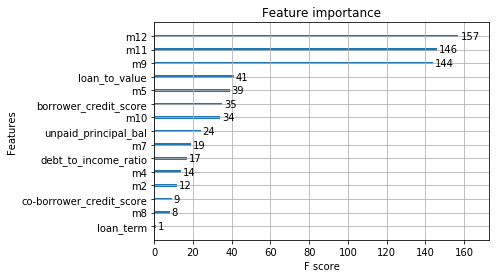

In [154]:
from matplotlib import pyplot
from xgboost import plot_importance
# plot feature importance
plot_importance(modelxgbnew)
pyplot.show()

In [311]:
df_test.shape

(35866, 49)

In [312]:
X.shape

(116058, 49)

In [155]:
df_test_y=modelxgbnew.predict(df_test)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [92]:
df_test_y.shape

(49739,)

In [166]:
df_test.head()

interest_rate  unpaid_principal_bal  loan_term  loan_to_value  \
0          3.875                417000        360             75   
1          4.500                113000        360             80   
2          4.500                 72000        360             75   
3          4.125                123000        180             41   
4          3.250                166000        180             53   

   number_of_borrowers  debt_to_income_ratio  borrower_credit_score  \
0                    1                    20                    790   
1                    2                    33                    793   
2                    1                    34                    710   
3                    2                    24                    798   
4                    2                    12                    767   

   insurance_percent  co-borrower_credit_score  insurance_type  \
0                  0                         0               0   
1                  0                       784               0   
2                  0                         0               0   
3                  0                       813               0   
4                  0                       768               0   

         ...         financial_institution_Taylor, Hunt and Rodriguez  \
0        ...                                                        0   
1        ...                                                        0   
2        ...                                                        0   
3        ...                                                        0   
4        ...                                                        0   

   financial_institution_Thornton-Davis  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   financial_institution_Turner, Baldwin and Rhodes  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   origination_date_2012-02-01  origination_date_2012-03-01  \
0                            1                            0   
1                            1                            0   
2                            0                            0   
3                            1                            0   
4                            1                            0   

   first_payment_date_03/2012  first_payment_date_04/2012  \
0                           0                           1   
1                           0                           1   
2                           1                           0   
3                           0                           1   
4                           0                           1   

   first_payment_date_05/2012  loan_purpose_B12  loan_purpose_C86  
0                           0                 0                 0  
1                           0                 0                 1  
2                           0                 0                 1  
3                           0                 0                 0  
4                           0                 0                 0  

[5 rows x 49 columns]

In [36]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

features = [c for c in df.columns if c not in ['m13']] #basic features
target = df['m13']

In [37]:
param = {
    'bagging_freq': 5,          
    'bagging_fraction': 0.38,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 0.04,     'learning_rate': 0.0085,
    'max_depth': -1,             'metric':'auc',                'min_data_in_leaf': 80,     'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,            'num_threads': 8,              'tree_learner': 'serial',   'objective': 'binary',
    'reg_alpha': 0.1302650970728192, 'reg_lambda': 0.3603427518866501,'verbosity': 1
}
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=99999)
oof = np.zeros(len(df))
predictions = np.zeros(len(df_test))
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(df.iloc[val_idx][features], label=target.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 2000)
    oof[val_idx] = clf.predict(df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[features], num_iteration=clf.best_iteration) / folds.n_splits


Fold 0
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[444]	training's auc: 0.89078	valid_1's auc: 0.909384
Fold 1
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[448]	training's auc: 0.895396	valid_1's auc: 0.876586
Fold 2
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[1938]	training's auc: 0.904105	valid_1's auc: 0.896528
Fold 3
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[136]	training's auc: 0.894155	valid_1's auc: 0.911093
Fold 4
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[1533]	training's auc: 0.907249	valid_1's auc: 0.85543
Fold 5
Training until validation scores don't improve for 2000 rounds.
Early stopping, best iteration is:
[123]	training's auc: 0.890913	valid_1's auc: 0.930694
Fold 6
Training until validation s

In [38]:
df_test_y=clf.predict(df_test)

AttributeError: 'Booster' object has no attribute 'predict_proba'

In [36]:
from sklearn.svm import SVC
svc=SVC(C=0.1, gamma=0.1, kernel='rbf')

In [43]:
from sklearn.model_selection import GridSearchCV

In [33]:

param_grid={'C':[0.1,1],'gamma':[0.1,0.01],'kernel': ['rbf','sigmoid','linear','poly']}
grid=GridSearchCV(SVC(),param_grid,verbose=3, refit=True)

In [ ]:
grid.fit(X,y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9945157284768212, total=28.5min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 38.0min remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.994515586599405, total=31.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 78.6min remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.994515586599405, total=29.1min
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.9945157284768212, total=   6.9s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.994515586599405, total=   7.5s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV]  C=0.1, gamma=0.1, kernel=sigmoid, score=0.994515586599405, total=   6.8s
[CV] C=0.1, gamma=0.1, kernel=linear .................................


In [ ]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import f1_score
kf = StratifiedKFold(n_splits=8,random_state=None) 

for k_fold,(train_index, test_index) in enumerate(kf.split(X,y)):
      #print("Train:", train_index, "Validation:",test_index)
      print("for fold {}  accurancy is".format(k_fold))
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      svc.fit(X_train,y_train)
      y_pred=svc.predict(X_test)
      print(f1_score(y_pred,y_test))

for fold 0  accurancy is


C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


0.0
for fold 1  accurancy is


In [45]:
# Remake our test/train set with our reduced dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

reduc_estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.0085,0.085,0.01,0.10, 0.125, 0.15, 0.175, 0.2]}

gridsearch = GridSearchCV(reduc_estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 2000)
print('Best parameters found by grid search are:', gridsearch.best_params_)

[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0107304	valid_0's binary_logloss: 0.029746
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826421	valid_0's l1: 0.0106983	valid_0's binary_logloss: 0.028721
[3]	valid_0's auc: 0.84211	valid_0's l1: 0.0106636	valid_0's binary_logloss: 0.0279559
[4]	valid_0's auc: 0.842237	valid_0's l1: 0.0106306	valid_0's binary_logloss: 0.0273952
[5]	valid_0's auc: 0.842251	valid_0's l1: 0.010595	valid_0's binary_logloss: 0.026884
[6]	valid_0's auc: 0.842205	valid_0's l1: 0.0105612	valid_0's binary_logloss: 0.0264955
[7]	valid_0's auc: 0.842363	valid_0's l1: 0.0105262	valid_0's binary_logloss: 0.0261278
[8]	valid_0's auc: 0.849433	valid_0's l1: 0.0104921	valid_0's binary_logloss: 0.02579
[9]	valid_0's auc: 0.849402	valid_0's l1: 0.010461	valid_0's binary_logloss: 0.0255214
[10]	valid_0's auc: 0.849101	valid_0's l1: 0.0104306	valid_0's binary_logloss: 0.0252797
[11]	valid_0's auc: 0.850942	valid_0's l1: 0.0103993	valid_0's 

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.010743	valid_0's binary_logloss: 0.0298348
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851623	valid_0's l1: 0.0107136	valid_0's binary_logloss: 0.0288526
[3]	valid_0's auc: 0.865857	valid_0's l1: 0.0106819	valid_0's binary_logloss: 0.0281526
[4]	valid_0's auc: 0.865739	valid_0's l1: 0.0106519	valid_0's binary_logloss: 0.0275868
[5]	valid_0's auc: 0.866049	valid_0's l1: 0.0106204	valid_0's binary_logloss: 0.0271238
[6]	valid_0's auc: 0.866006	valid_0's l1: 0.0105927	valid_0's binary_logloss: 0.0267483
[7]	valid_0's auc: 0.86584	valid_0's l1: 0.0105626	valid_0's binary_logloss: 0.0264277
[8]	valid_0's auc: 0.865953	valid_0's l1: 0.0105326	valid_0's binary_logloss: 0.0261091
[9]	valid_0's auc: 0.866016	valid_0's l1: 0.0105045	valid_0's binary_logloss: 0.0258366
[10]	valid_0's auc: 0.865644	valid_0's l1: 0.0104755	valid_0's binary_logloss: 0.0256112
[11]	valid_0's auc: 0.865626	valid_0's l1: 0.0104466	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107513	valid_0's binary_logloss: 0.0297733
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.849462	valid_0's l1: 0.0107198	valid_0's binary_logloss: 0.0287655
[3]	valid_0's auc: 0.849385	valid_0's l1: 0.010688	valid_0's binary_logloss: 0.028056
[4]	valid_0's auc: 0.849097	valid_0's l1: 0.0106557	valid_0's binary_logloss: 0.0274961
[5]	valid_0's auc: 0.849298	valid_0's l1: 0.0106242	valid_0's binary_logloss: 0.0269866
[6]	valid_0's auc: 0.847968	valid_0's l1: 0.0105938	valid_0's binary_logloss: 0.0265996
[7]	valid_0's auc: 0.849434	valid_0's l1: 0.0105625	valid_0's binary_logloss: 0.026225
[8]	valid_0's auc: 0.862304	valid_0's l1: 0.0105311	valid_0's binary_logloss: 0.0258887
[9]	valid_0's auc: 0.861811	valid_0's l1: 0.010502	valid_0's binary_logloss: 0.0256022
[10]	valid_0's auc: 0.883816	valid_0's l1: 0.0104723	valid_0's binary_logloss: 0.0253599
[11]	valid_0's auc: 0.877835	valid_0's l1: 0.0104424	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.00992345	valid_0's binary_logloss: 0.0252092
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.777788	valid_0's l1: 0.0100655	valid_0's binary_logloss: 0.0332105
[3]	valid_0's auc: 0.848921	valid_0's l1: 0.00950079	valid_0's binary_logloss: 0.0227188
[4]	valid_0's auc: 0.723401	valid_0's l1: 0.00988335	valid_0's binary_logloss: 0.0433457
[5]	valid_0's auc: 0.736788	valid_0's l1: 0.00970565	valid_0's binary_logloss: 0.0430667
[6]	valid_0's auc: 0.737884	valid_0's l1: 0.00951196	valid_0's binary_logloss: 0.0428539
[7]	valid_0's auc: 0.856118	valid_0's l1: 0.00872142	valid_0's binary_logloss: 0.0217933
[8]	valid_0's auc: 0.859181	valid_0's l1: 0.00857706	valid_0's binary_logloss: 0.0216171
[9]	valid_0's auc: 0.867788	valid_0's l1: 0.00843033	valid_0's binary_logloss: 0.021515
[10]	valid_0's auc: 0.877863	valid_0's l1: 0.00833149	valid_0's binary_logloss: 0.0214914
[11]	valid_0's auc: 0.878496	valid_0's l1: 0.00

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.00976699	valid_0's binary_logloss: 0.0235237
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.79881	valid_0's l1: 0.00987246	valid_0's binary_logloss: 0.0347413
[3]	valid_0's auc: 0.804164	valid_0's l1: 0.0096707	valid_0's binary_logloss: 0.0326208
[4]	valid_0's auc: 0.811557	valid_0's l1: 0.00936854	valid_0's binary_logloss: 0.0309732
[5]	valid_0's auc: 0.826407	valid_0's l1: 0.00911602	valid_0's binary_logloss: 0.0276713
[6]	valid_0's auc: 0.868719	valid_0's l1: 0.00879344	valid_0's binary_logloss: 0.0215291
[7]	valid_0's auc: 0.868751	valid_0's l1: 0.0085842	valid_0's binary_logloss: 0.0213504
[8]	valid_0's auc: 0.873262	valid_0's l1: 0.00843255	valid_0's binary_logloss: 0.0211699
[9]	valid_0's auc: 0.897531	valid_0's l1: 0.00828864	valid_0's binary_logloss: 0.0208074
[10]	valid_0's auc: 0.895233	valid_0's l1: 0.00814577	valid_0's binary_logloss: 0.0207174
[11]	valid_0's auc: 0.893525	valid_0's l1: 0.008

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0103766	valid_0's binary_logloss: 0.0287471
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.699498	valid_0's l1: 0.01059	valid_0's binary_logloss: 0.043438
[3]	valid_0's auc: 0.698477	valid_0's l1: 0.0104351	valid_0's binary_logloss: 0.0427205
[4]	valid_0's auc: 0.746491	valid_0's l1: 0.00996711	valid_0's binary_logloss: 0.0399574
[5]	valid_0's auc: 0.754621	valid_0's l1: 0.00982959	valid_0's binary_logloss: 0.0399853
[6]	valid_0's auc: 0.770978	valid_0's l1: 0.00960962	valid_0's binary_logloss: 0.0404067
[7]	valid_0's auc: 0.767729	valid_0's l1: 0.00944922	valid_0's binary_logloss: 0.0433769
[8]	valid_0's auc: 0.767272	valid_0's l1: 0.00938577	valid_0's binary_logloss: 0.0442781
[9]	valid_0's auc: 0.772072	valid_0's l1: 0.0092808	valid_0's binary_logloss: 0.044048
[10]	valid_0's auc: 0.770538	valid_0's l1: 0.00916742	valid_0's binary_logloss: 0.0441578
[11]	valid_0's auc: 0.768092	valid_0's l1: 0.00903486

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826853	valid_0's l1: 0.010717	valid_0's binary_logloss: 0.0291281
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.826404	valid_0's l1: 0.0106799	valid_0's binary_logloss: 0.0281277
[3]	valid_0's auc: 0.826741	valid_0's l1: 0.0106377	valid_0's binary_logloss: 0.0273973
[4]	valid_0's auc: 0.826623	valid_0's l1: 0.0105977	valid_0's binary_logloss: 0.026842
[5]	valid_0's auc: 0.842373	valid_0's l1: 0.0105581	valid_0's binary_logloss: 0.0263952
[6]	valid_0's auc: 0.842275	valid_0's l1: 0.0105179	valid_0's binary_logloss: 0.0259886
[7]	valid_0's auc: 0.850199	valid_0's l1: 0.0104791	valid_0's binary_logloss: 0.0256568
[8]	valid_0's auc: 0.849977	valid_0's l1: 0.0104424	valid_0's binary_logloss: 0.0253619
[9]	valid_0's auc: 0.849594	valid_0's l1: 0.0104055	valid_0's binary_logloss: 0.0250899
[10]	valid_0's auc: 0.851735	valid_0's l1: 0.0103687	valid_0's binary_logloss: 0.0248191
[11]	valid_0's auc: 0.878013	valid_0's l1: 0.0103325	vali

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834873	valid_0's l1: 0.0107283	valid_0's binary_logloss: 0.0292327
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.851655	valid_0's l1: 0.010692	valid_0's binary_logloss: 0.0282924
[3]	valid_0's auc: 0.865863	valid_0's l1: 0.0106545	valid_0's binary_logloss: 0.027621
[4]	valid_0's auc: 0.866094	valid_0's l1: 0.0106178	valid_0's binary_logloss: 0.0270307
[5]	valid_0's auc: 0.865883	valid_0's l1: 0.0105804	valid_0's binary_logloss: 0.0265857
[6]	valid_0's auc: 0.865898	valid_0's l1: 0.0105483	valid_0's binary_logloss: 0.0262198
[7]	valid_0's auc: 0.86581	valid_0's l1: 0.010513	valid_0's binary_logloss: 0.0259068
[8]	valid_0's auc: 0.865879	valid_0's l1: 0.0104784	valid_0's binary_logloss: 0.0256038
[9]	valid_0's auc: 0.865717	valid_0's l1: 0.0104442	valid_0's binary_logloss: 0.0253516
[10]	valid_0's auc: 0.865796	valid_0's l1: 0.0104089	valid_0's binary_logloss: 0.0251067
[11]	valid_0's auc: 0.865756	valid_0's l1: 0.0103766	valid_

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107401	valid_0's binary_logloss: 0.0291617
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.84943	valid_0's l1: 0.0107031	valid_0's binary_logloss: 0.0281907
[3]	valid_0's auc: 0.847835	valid_0's l1: 0.0106667	valid_0's binary_logloss: 0.0274952
[4]	valid_0's auc: 0.849023	valid_0's l1: 0.0106302	valid_0's binary_logloss: 0.0269269
[5]	valid_0's auc: 0.85051	valid_0's l1: 0.0105933	valid_0's binary_logloss: 0.0264341
[6]	valid_0's auc: 0.862218	valid_0's l1: 0.010556	valid_0's binary_logloss: 0.0260088
[7]	valid_0's auc: 0.86182	valid_0's l1: 0.010522	valid_0's binary_logloss: 0.0256594
[8]	valid_0's auc: 0.861619	valid_0's l1: 0.0104878	valid_0's binary_logloss: 0.0253573
[9]	valid_0's auc: 0.88337	valid_0's l1: 0.0104528	valid_0's binary_logloss: 0.0250749
[10]	valid_0's auc: 0.878145	valid_0's l1: 0.0104163	valid_0's binary_logloss: 0.0248011
[11]	valid_0's auc: 0.878224	valid_0's l1: 0.0103812	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0101807	valid_0's binary_logloss: 0.0282529
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.462617	valid_0's l1: 0.0113571	valid_0's binary_logloss: 0.0879762
[3]	valid_0's auc: 0.72021	valid_0's l1: 0.010286	valid_0's binary_logloss: 0.0644522
[4]	valid_0's auc: 0.704889	valid_0's l1: 0.00969376	valid_0's binary_logloss: 0.0574994
[5]	valid_0's auc: 0.707095	valid_0's l1: 0.00947706	valid_0's binary_logloss: 0.0567424
[6]	valid_0's auc: 0.707558	valid_0's l1: 0.0093101	valid_0's binary_logloss: 0.0556597
[7]	valid_0's auc: 0.763869	valid_0's l1: 0.0088455	valid_0's binary_logloss: 0.0492722
[8]	valid_0's auc: 0.765316	valid_0's l1: 0.00863848	valid_0's binary_logloss: 0.0478973
[9]	valid_0's auc: 0.76537	valid_0's l1: 0.00853875	valid_0's binary_logloss: 0.0472883
[10]	valid_0's auc: 0.761696	valid_0's l1: 0.00836166	valid_0's binary_logloss: 0.0469543
[11]	valid_0's auc: 0.760049	valid_0's l1: 0.00825821

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834927	valid_0's l1: 0.0100367	valid_0's binary_logloss: 0.0255735
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.644275	valid_0's l1: 0.0108541	valid_0's binary_logloss: 0.0517512
[3]	valid_0's auc: 0.661227	valid_0's l1: 0.0103937	valid_0's binary_logloss: 0.0509954
[4]	valid_0's auc: 0.695484	valid_0's l1: 0.00991903	valid_0's binary_logloss: 0.0447346
[5]	valid_0's auc: 0.696686	valid_0's l1: 0.00973862	valid_0's binary_logloss: 0.0448555
[6]	valid_0's auc: 0.698511	valid_0's l1: 0.00954689	valid_0's binary_logloss: 0.0446841
[7]	valid_0's auc: 0.699396	valid_0's l1: 0.00935108	valid_0's binary_logloss: 0.0444898
[8]	valid_0's auc: 0.703443	valid_0's l1: 0.00921561	valid_0's binary_logloss: 0.044572
[9]	valid_0's auc: 0.703371	valid_0's l1: 0.00908463	valid_0's binary_logloss: 0.04465
[10]	valid_0's auc: 0.750796	valid_0's l1: 0.00887557	valid_0's binary_logloss: 0.0444829
[11]	valid_0's auc: 0.771928	valid_0's l1: 0.008565

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0107174	valid_0's binary_logloss: 0.0326311
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.457563	valid_0's l1: 0.0120287	valid_0's binary_logloss: 0.0779228
[3]	valid_0's auc: 0.703099	valid_0's l1: 0.0105675	valid_0's binary_logloss: 0.0416352
[4]	valid_0's auc: 0.784264	valid_0's l1: 0.0100238	valid_0's binary_logloss: 0.0384218
[5]	valid_0's auc: 0.78874	valid_0's l1: 0.00974966	valid_0's binary_logloss: 0.0379282
[6]	valid_0's auc: 0.788991	valid_0's l1: 0.00954441	valid_0's binary_logloss: 0.037778
[7]	valid_0's auc: 0.797406	valid_0's l1: 0.00935588	valid_0's binary_logloss: 0.0377658
[8]	valid_0's auc: 0.797641	valid_0's l1: 0.00903728	valid_0's binary_logloss: 0.0363798
[9]	valid_0's auc: 0.800212	valid_0's l1: 0.0088816	valid_0's binary_logloss: 0.0353372
[10]	valid_0's auc: 0.800874	valid_0's l1: 0.0087434	valid_0's binary_logloss: 0.0352027
[11]	valid_0's auc: 0.79952	valid_0's l1: 0.00855785	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.010581	valid_0's binary_logloss: 0.0339715
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.352407	valid_0's l1: 0.0113518	valid_0's binary_logloss: 0.105243
[3]	valid_0's auc: 0.447747	valid_0's l1: 0.0114191	valid_0's binary_logloss: 0.118968
[4]	valid_0's auc: 0.519755	valid_0's l1: 0.0108776	valid_0's binary_logloss: 0.110499
[5]	valid_0's auc: 0.836429	valid_0's l1: 0.00951705	valid_0's binary_logloss: 0.070892
[6]	valid_0's auc: 0.807343	valid_0's l1: 0.0092669	valid_0's binary_logloss: 0.0715514
[7]	valid_0's auc: 0.743481	valid_0's l1: 0.00885858	valid_0's binary_logloss: 0.0683792
[8]	valid_0's auc: 0.761529	valid_0's l1: 0.00855564	valid_0's binary_logloss: 0.0660473
[9]	valid_0's auc: 0.81004	valid_0's l1: 0.00836609	valid_0's binary_logloss: 0.0687217
[10]	valid_0's auc: 0.809092	valid_0's l1: 0.00827142	valid_0's binary_logloss: 0.0683195
[11]	valid_0's auc: 0.807891	valid_0's l1: 0.00796405	va

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834925	valid_0's l1: 0.0104715	valid_0's binary_logloss: 0.0298989
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.408554	valid_0's l1: 0.011444	valid_0's binary_logloss: 0.0923495
[3]	valid_0's auc: 0.464088	valid_0's l1: 0.0111642	valid_0's binary_logloss: 0.0917649
[4]	valid_0's auc: 0.577933	valid_0's l1: 0.010402	valid_0's binary_logloss: 0.0736512
[5]	valid_0's auc: 0.622056	valid_0's l1: 0.0101867	valid_0's binary_logloss: 0.0776549
[6]	valid_0's auc: 0.706463	valid_0's l1: 0.0096715	valid_0's binary_logloss: 0.0631806
[7]	valid_0's auc: 0.711483	valid_0's l1: 0.00954073	valid_0's binary_logloss: 0.0630272
[8]	valid_0's auc: 0.711048	valid_0's l1: 0.00941931	valid_0's binary_logloss: 0.0633437
[9]	valid_0's auc: 0.726329	valid_0's l1: 0.00931212	valid_0's binary_logloss: 0.0630934
[10]	valid_0's auc: 0.739294	valid_0's l1: 0.00914014	valid_0's binary_logloss: 0.0600916
[11]	valid_0's auc: 0.732485	valid_0's l1: 0.00890897

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0111914	valid_0's binary_logloss: 0.0398581
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.448547	valid_0's l1: 0.012028	valid_0's binary_logloss: 0.102028
[3]	valid_0's auc: 0.483046	valid_0's l1: 0.0117912	valid_0's binary_logloss: 0.104751
[4]	valid_0's auc: 0.476386	valid_0's l1: 0.0116309	valid_0's binary_logloss: 0.104525
[5]	valid_0's auc: 0.477805	valid_0's l1: 0.0114188	valid_0's binary_logloss: 0.109789
[6]	valid_0's auc: 0.57484	valid_0's l1: 0.0106281	valid_0's binary_logloss: 0.0918069
[7]	valid_0's auc: 0.638201	valid_0's l1: 0.0100552	valid_0's binary_logloss: 0.077815
[8]	valid_0's auc: 0.638385	valid_0's l1: 0.00981623	valid_0's binary_logloss: 0.0823643
[9]	valid_0's auc: 0.640425	valid_0's l1: 0.00964492	valid_0's binary_logloss: 0.0820189
[10]	valid_0's auc: 0.627555	valid_0's l1: 0.00960288	valid_0's binary_logloss: 0.0826586
[11]	valid_0's auc: 0.672376	valid_0's l1: 0.00921214	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0109206	valid_0's binary_logloss: 0.0402456
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.399032	valid_0's l1: 0.0112031	valid_0's binary_logloss: 0.103997
[3]	valid_0's auc: 0.476225	valid_0's l1: 0.0109461	valid_0's binary_logloss: 0.112192
[4]	valid_0's auc: 0.600213	valid_0's l1: 0.0105088	valid_0's binary_logloss: 0.111811
[5]	valid_0's auc: 0.656167	valid_0's l1: 0.0104629	valid_0's binary_logloss: 0.103644
[6]	valid_0's auc: 0.653874	valid_0's l1: 0.0103114	valid_0's binary_logloss: 0.104221
[7]	valid_0's auc: 0.664738	valid_0's l1: 0.0099628	valid_0's binary_logloss: 0.101145
[8]	valid_0's auc: 0.601509	valid_0's l1: 0.00993762	valid_0's binary_logloss: 0.108101
[9]	valid_0's auc: 0.601259	valid_0's l1: 0.0099144	valid_0's binary_logloss: 0.107318
[10]	valid_0's auc: 0.625995	valid_0's l1: 0.00974404	valid_0's binary_logloss: 0.100724
[11]	valid_0's auc: 0.686396	valid_0's l1: 0.00955181	valid_0'

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0108247	valid_0's binary_logloss: 0.0350652
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.519429	valid_0's l1: 0.0109108	valid_0's binary_logloss: 0.0758001
[3]	valid_0's auc: 0.614308	valid_0's l1: 0.0106506	valid_0's binary_logloss: 0.0793175
[4]	valid_0's auc: 0.696088	valid_0's l1: 0.0100403	valid_0's binary_logloss: 0.0678469
[5]	valid_0's auc: 0.743172	valid_0's l1: 0.00957411	valid_0's binary_logloss: 0.0608308
[6]	valid_0's auc: 0.742598	valid_0's l1: 0.00930158	valid_0's binary_logloss: 0.0597574
[7]	valid_0's auc: 0.744192	valid_0's l1: 0.00907653	valid_0's binary_logloss: 0.0597159
[8]	valid_0's auc: 0.727066	valid_0's l1: 0.00874165	valid_0's binary_logloss: 0.0596974
[9]	valid_0's auc: 0.753904	valid_0's l1: 0.00843797	valid_0's binary_logloss: 0.0551386
[10]	valid_0's auc: 0.75739	valid_0's l1: 0.00835313	valid_0's binary_logloss: 0.0565796
[11]	valid_0's auc: 0.753261	valid_0's l1: 0.00823

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0115726	valid_0's binary_logloss: 0.0476969
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.490346	valid_0's l1: 0.0110301	valid_0's binary_logloss: 0.0866689
[3]	valid_0's auc: 0.708813	valid_0's l1: 0.0102673	valid_0's binary_logloss: 0.0720947
[4]	valid_0's auc: 0.737889	valid_0's l1: 0.00982948	valid_0's binary_logloss: 0.0682872
[5]	valid_0's auc: 0.777696	valid_0's l1: 0.00971667	valid_0's binary_logloss: 0.071098
[6]	valid_0's auc: 0.764194	valid_0's l1: 0.0102555	valid_0's binary_logloss: 0.07341
[7]	valid_0's auc: 0.748945	valid_0's l1: 0.0100307	valid_0's binary_logloss: 0.0749235
[8]	valid_0's auc: 0.749809	valid_0's l1: 0.00956842	valid_0's binary_logloss: 0.0761356
[9]	valid_0's auc: 0.721138	valid_0's l1: 0.00966531	valid_0's binary_logloss: 0.0730674
[10]	valid_0's auc: 0.720188	valid_0's l1: 0.00953125	valid_0's binary_logloss: 0.0776485
[11]	valid_0's auc: 0.721742	valid_0's l1: 0.00944264

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.0111891	valid_0's binary_logloss: 0.0469294
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.30663	valid_0's l1: 0.0117257	valid_0's binary_logloss: 0.117743
[3]	valid_0's auc: 0.353267	valid_0's l1: 0.0115151	valid_0's binary_logloss: 0.117447
[4]	valid_0's auc: 0.676664	valid_0's l1: 0.0107572	valid_0's binary_logloss: 0.105343
[5]	valid_0's auc: 0.672956	valid_0's l1: 0.010561	valid_0's binary_logloss: 0.10537
[6]	valid_0's auc: 0.671588	valid_0's l1: 0.0102276	valid_0's binary_logloss: 0.107278
[7]	valid_0's auc: 0.58633	valid_0's l1: 0.00956615	valid_0's binary_logloss: 0.0965109
[8]	valid_0's auc: 0.596055	valid_0's l1: 0.00954366	valid_0's binary_logloss: 0.101142
[9]	valid_0's auc: 0.639489	valid_0's l1: 0.0100112	valid_0's binary_logloss: 0.10933
[10]	valid_0's auc: 0.74217	valid_0's l1: 0.0108017	valid_0's binary_logloss: 0.112018
[11]	valid_0's auc: 0.731079	valid_0's l1: 0.0102968	valid_0's bina

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834911	valid_0's l1: 0.0111109	valid_0's binary_logloss: 0.0407604
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.497066	valid_0's l1: 0.0106262	valid_0's binary_logloss: 0.0837333
[3]	valid_0's auc: 0.623916	valid_0's l1: 0.0101607	valid_0's binary_logloss: 0.068306
[4]	valid_0's auc: 0.643871	valid_0's l1: 0.0100004	valid_0's binary_logloss: 0.0677343
[5]	valid_0's auc: 0.663496	valid_0's l1: 0.0100231	valid_0's binary_logloss: 0.0698676
[6]	valid_0's auc: 0.66399	valid_0's l1: 0.00992974	valid_0's binary_logloss: 0.0711682
[7]	valid_0's auc: 0.724712	valid_0's l1: 0.00964765	valid_0's binary_logloss: 0.0681956
[8]	valid_0's auc: 0.691638	valid_0's l1: 0.00949451	valid_0's binary_logloss: 0.0716181
[9]	valid_0's auc: 0.69593	valid_0's l1: 0.00944503	valid_0's binary_logloss: 0.0725984
[10]	valid_0's auc: 0.700524	valid_0's l1: 0.00935492	valid_0's binary_logloss: 0.070279
[11]	valid_0's auc: 0.723129	valid_0's l1: 0.00948906	

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0118859	valid_0's binary_logloss: 0.0559507
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.454659	valid_0's l1: 0.0106719	valid_0's binary_logloss: 0.0967594
[3]	valid_0's auc: 0.631172	valid_0's l1: 0.0101939	valid_0's binary_logloss: 0.0698975
[4]	valid_0's auc: 0.650461	valid_0's l1: 0.00975929	valid_0's binary_logloss: 0.0665498
[5]	valid_0's auc: 0.787164	valid_0's l1: 0.00902119	valid_0's binary_logloss: 0.0582411
[6]	valid_0's auc: 0.783986	valid_0's l1: 0.00873699	valid_0's binary_logloss: 0.058247
[7]	valid_0's auc: 0.780815	valid_0's l1: 0.00851213	valid_0's binary_logloss: 0.0585543
[8]	valid_0's auc: 0.778276	valid_0's l1: 0.00906284	valid_0's binary_logloss: 0.0797695
[9]	valid_0's auc: 0.767814	valid_0's l1: 0.00859435	valid_0's binary_logloss: 0.0701502
[10]	valid_0's auc: 0.770997	valid_0's l1: 0.00863522	valid_0's binary_logloss: 0.0725954
[11]	valid_0's auc: 0.773859	valid_0's l1: 0.0086

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.826839	valid_0's l1: 0.011405	valid_0's binary_logloss: 0.0539269
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.495148	valid_0's l1: 0.010952	valid_0's binary_logloss: 0.0913156
[3]	valid_0's auc: 0.510451	valid_0's l1: 0.0105324	valid_0's binary_logloss: 0.0973116
[4]	valid_0's auc: 0.548483	valid_0's l1: 0.0107135	valid_0's binary_logloss: 0.110649
[5]	valid_0's auc: 0.548307	valid_0's l1: 0.0106732	valid_0's binary_logloss: 0.121882
[6]	valid_0's auc: 0.604153	valid_0's l1: 0.0101895	valid_0's binary_logloss: 0.113011
[7]	valid_0's auc: 0.621102	valid_0's l1: 0.0104349	valid_0's binary_logloss: 0.11436
[8]	valid_0's auc: 0.7306	valid_0's l1: 0.00946967	valid_0's binary_logloss: 0.094297
[9]	valid_0's auc: 0.722312	valid_0's l1: 0.00922019	valid_0's binary_logloss: 0.0944972
[10]	valid_0's auc: 0.862684	valid_0's l1: 0.00905421	valid_0's binary_logloss: 0.0990822
[11]	valid_0's auc: 0.796456	valid_0's l1: 0.0089156	valid_0's

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.834897	valid_0's l1: 0.0113889	valid_0's binary_logloss: 0.0467881
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.452716	valid_0's l1: 0.010689	valid_0's binary_logloss: 0.0804181
[3]	valid_0's auc: 0.715155	valid_0's l1: 0.0110046	valid_0's binary_logloss: 0.109612
[4]	valid_0's auc: 0.669326	valid_0's l1: 0.00970865	valid_0's binary_logloss: 0.076891
[5]	valid_0's auc: 0.717793	valid_0's l1: 0.00988222	valid_0's binary_logloss: 0.0869014
[6]	valid_0's auc: 0.709338	valid_0's l1: 0.00940612	valid_0's binary_logloss: 0.0727109
[7]	valid_0's auc: 0.753031	valid_0's l1: 0.00983692	valid_0's binary_logloss: 0.0847319
[8]	valid_0's auc: 0.730662	valid_0's l1: 0.00954031	valid_0's binary_logloss: 0.0896675
[9]	valid_0's auc: 0.713745	valid_0's l1: 0.00941218	valid_0's binary_logloss: 0.0820915
[10]	valid_0's auc: 0.706068	valid_0's l1: 0.00904754	valid_0's binary_logloss: 0.0794359
[11]	valid_0's auc: 0.696734	valid_0's l1: 0.009680

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.850132	valid_0's l1: 0.0121632	valid_0's binary_logloss: 0.0645091
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.600616	valid_0's l1: 0.010868	valid_0's binary_logloss: 0.0726247
[3]	valid_0's auc: 0.767079	valid_0's l1: 0.0104061	valid_0's binary_logloss: 0.0824479
[4]	valid_0's auc: 0.78643	valid_0's l1: 0.00962515	valid_0's binary_logloss: 0.0739273
[5]	valid_0's auc: 0.81251	valid_0's l1: 0.009974	valid_0's binary_logloss: 0.0706214
[6]	valid_0's auc: 0.799849	valid_0's l1: 0.0101847	valid_0's binary_logloss: 0.0725299
[7]	valid_0's auc: 0.721103	valid_0's l1: 0.0108191	valid_0's binary_logloss: 0.0859175
[8]	valid_0's auc: 0.740358	valid_0's l1: 0.0102755	valid_0's binary_logloss: 0.0835932
[9]	valid_0's auc: 0.757044	valid_0's l1: 0.0104137	valid_0's binary_logloss: 0.0843971
[10]	valid_0's auc: 0.748869	valid_0's l1: 0.0100368	valid_0's binary_logloss: 0.0805316
[11]	valid_0's auc: 0.680149	valid_0's l1: 0.0100005	valid

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.832089	valid_0's l1: 0.0100462	valid_0's binary_logloss: 0.0260027
Training until validation scores don't improve for 2000 rounds.
[2]	valid_0's auc: 0.807158	valid_0's l1: 0.00989912	valid_0's binary_logloss: 0.0327701
[3]	valid_0's auc: 0.864391	valid_0's l1: 0.0093963	valid_0's binary_logloss: 0.0235746
[4]	valid_0's auc: 0.859309	valid_0's l1: 0.00918223	valid_0's binary_logloss: 0.0233659
[5]	valid_0's auc: 0.876352	valid_0's l1: 0.00896349	valid_0's binary_logloss: 0.0226298
[6]	valid_0's auc: 0.876665	valid_0's l1: 0.00876008	valid_0's binary_logloss: 0.0223747
[7]	valid_0's auc: 0.875033	valid_0's l1: 0.00858321	valid_0's binary_logloss: 0.0222062
[8]	valid_0's auc: 0.866236	valid_0's l1: 0.00840741	valid_0's binary_logloss: 0.0219151
[9]	valid_0's auc: 0.866809	valid_0's l1: 0.00827054	valid_0's binary_logloss: 0.0218487
[10]	valid_0's auc: 0.876112	valid_0's l1: 0.00813879	valid_0's binary_logloss: 0.0217701
[11]	valid_0's auc: 0.86808	valid_0's l1: 0.008

In [49]:
predictions=gridsearch.predict(df_test)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [50]:
predictions[0]

0

In [57]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [58]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [59]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [60]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [61]:
opt_parameters = {'colsample_bytree': 0.9234, 'min_child_samples': 399, 'min_child_weight': 0.1, 'num_leaves': 13, 'reg_alpha': 2, 'reg_lambda': 5, 'subsample': 0.855}

In [62]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9234, importance_type='split',
        learning_rate=0.1, max_depth=-1, metric='None',
        min_child_samples=399, min_child_weight=0.1, min_split_gain=0.0,
        n_estimators=5000, n_jobs=4, num_leaves=13, objective=None,
        random_state=314, reg_alpha=2, reg_lambda=5, silent=True,
        subsample=0.855, subsample_for_bin=200000, subsample_freq=0)

In [63]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='roc_auc',
                                cv=5,
                                refit=True,
                                verbose=True)

In [64]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Training until validation scores don't improve for 30 rounds.
[100]	valid's auc: 0.810919
Early stopping, best iteration is:
[85]	valid's auc: 0.812316
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[12]	valid's auc: 0.812635
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[54]	valid's auc: 0.805942
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[22]	valid's auc: 0.801338
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[56]	valid's auc: 0.814536
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[24]	valid's auc: 0.811369
Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[2]	valid's auc: 0.812261
Training until validation scores don't improv

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   14.1s finished


Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[6]	valid's auc: 0.885555
Best score reached: 0.8165045503666973 with params: {'scale_pos_weight': 1} 


In [71]:
df_test.head()

interest_rate  unpaid_principal_bal  loan_term  loan_to_value  \
0          3.875                417000        360             75   
1          4.500                113000        360             80   
2          4.500                 72000        360             75   
3          4.125                123000        180             41   
4          3.250                166000        180             53   

   number_of_borrowers  debt_to_income_ratio  borrower_credit_score  \
0                    1                    20                    790   
1                    2                    33                    793   
2                    1                    34                    710   
3                    2                    24                    798   
4                    2                    12                    767   

   insurance_percent  co-borrower_credit_score  insurance_type  \
0                  0                         0               0   
1                  0                       784               0   
2                  0                         0               0   
3                  0                       813               0   
4                  0                       768               0   

         ...         financial_institution_Taylor, Hunt and Rodriguez  \
0        ...                                                        0   
1        ...                                                        0   
2        ...                                                        0   
3        ...                                                        0   
4        ...                                                        0   

   financial_institution_Thornton-Davis  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   financial_institution_Turner, Baldwin and Rhodes  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   origination_date_2012-02-01  origination_date_2012-03-01  \
0                            1                            0   
1                            1                            0   
2                            0                            0   
3                            1                            0   
4                            1                            0   

   first_payment_date_03/2012  first_payment_date_04/2012  \
0                           0                           1   
1                           0                           1   
2                           1                           0   
3                           0                           1   
4                           0                           1   

   first_payment_date_05/2012  loan_purpose_B12  loan_purpose_C86  
0                           0                 0                 0  
1                           0                 0                 1  
2                           0                 0                 1  
3                           0                 0                 0  
4                           0                 0                 0  

[5 rows x 49 columns]

In [72]:
predictions=gs_sample_weight.predict(df_test)

C:\Users\kaushik\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
predictions[predictions==0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
sub=pd.DataFrame(columns=['loan_id','m13'])

In [67]:
sub['loan_id']=testmain['loan_id']

In [68]:
sub['m13']=predictions

In [69]:
sub.to_csv("C:\\Users\kaushik\Desktop\ML\independence day hackathon\\sub.csv")

In [70]:
testmain.shape

(35866, 28)

In [118]:
sub.shape

(49739, 2)